In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
files=['city_day.csv', 'city_hour.csv', 'station_day.csv', 'station_hour.csv', 'stations.csv']
azib= [pd.read_csv(file) for file in files]
df=pd.concat(azib, ignore_index=True)
df

/tmp/ipython-input-3450430870.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  azib= [pd.read_csv(file) for file in files]


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Datetime,StationId,StationName,State,Status
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,...,0.00,0.02,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,...,3.68,5.50,3.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,...,6.80,16.40,2.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,...,4.43,10.14,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,...,7.01,18.89,2.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3418972,Kolkata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,WB010,"Jadavpur, Kolkata - WBPCB",West Bengal,Active
3418973,Kolkata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,WB011,"Rabindra Bharati University, Kolkata - WBPCB",West Bengal,Active
3418974,Kolkata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,WB012,"Rabindra Sarobar, Kolkata - WBPCB",West Bengal,Active
3418975,Kolkata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,WB013,"Victoria, Kolkata - WBPCB",West Bengal,Active


Q.01) Which cities have the highest average AQI (Air Quality Index)?

Firstly we have to check null values in AQI column

In [35]:
df['AQI'].skew()

np.float64(4.285648063432165)

Now we have to impute the null values through median because the skew is greater than 1


In [36]:
df['AQI'].fillna(df['AQI'].median(), inplace=True)
df

/tmp/ipython-input-1168626584.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AQI'].fillna(df['AQI'].median(), inplace=True)


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Datetime,StationId,StationName,State,Status
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,...,0.00,0.02,0.00,127.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,...,3.68,5.50,3.77,127.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,...,6.80,16.40,2.25,127.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,...,4.43,10.14,1.00,127.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,...,7.01,18.89,2.78,127.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3418972,Kolkata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,127.0,NaN,NaN,WB010,"Jadavpur, Kolkata - WBPCB",West Bengal,Active
3418973,Kolkata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,127.0,NaN,NaN,WB011,"Rabindra Bharati University, Kolkata - WBPCB",West Bengal,Active
3418974,Kolkata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,127.0,NaN,NaN,WB012,"Rabindra Sarobar, Kolkata - WBPCB",West Bengal,Active
3418975,Kolkata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,127.0,NaN,NaN,WB013,"Victoria, Kolkata - WBPCB",West Bengal,Active


In [37]:
df.groupby('City')['AQI'].mean().sort_values(ascending=False).head(10)

,AQI
City,
Ahmedabad,336.767320
Delhi,258.674715
Lucknow,212.128052
Patna,207.809837
Gurugram,207.594573
Talcher,161.252220
Jorapokhar,147.547457
Brajrajnagar,144.450506
Guwahati,139.955458


Q.02) How does AQI vary by month or season?

In [38]:
#As there is no column named 'Month' or 'Season', sso we extract them from datetime column

#For Month
df['Date']=pd.to_datetime(df['Date'],errors='coerce')
df['Month']=df['Date'].dt.month
df.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Toluene,Xylene,AQI,AQI_Bucket,Datetime,StationId,StationName,State,Status,Month
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,...,0.02,0.00,127.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,...,5.50,3.77,127.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,...,16.40,2.25,127.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,...,10.14,1.00,127.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,...,18.89,2.78,127.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5,Ahmedabad,2015-01-06,NaN,NaN,45.41,38.48,81.50,NaN,45.41,45.76,...,10.83,1.93,127.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
6,Ahmedabad,2015-01-07,NaN,NaN,112.16,40.62,130.77,NaN,112.16,32.28,...,0.00,0.00,127.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
7,Ahmedabad,2015-01-08,NaN,NaN,80.87,36.74,96.75,NaN,80.87,38.54,...,0.00,0.00,127.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
8,Ahmedabad,2015-01-09,NaN,NaN,29.16,31.00,48.00,NaN,29.16,58.68,...,0.00,0.00,127.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
9,Ahmedabad,2015-01-10,NaN,NaN,NaN,7.04,0.00,NaN,NaN,8.29,...,0.00,0.00,127.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [39]:
#For Season

def get_season(month):
  if month in [12,1,2]:
    return 'Winter'
  elif month in [3,4,5]:
    return 'Summer'
  elif month in [6,7,8]:
    return 'Monsoon'
  elif month in [9,10,11]:
    return 'Autumn'

df['Season']=df['Month'].apply(get_season)
df.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Xylene,AQI,AQI_Bucket,Datetime,StationId,StationName,State,Status,Month,Season
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,...,0.00,127.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Winter
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,...,3.77,127.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Winter
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,...,2.25,127.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Winter
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,...,1.00,127.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Winter
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,...,2.78,127.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Winter


In [40]:
df.groupby('Season')['AQI'].mean().sort_values(ascending=False)

,AQI
Season,
Winter,219.836649
Autumn,181.636638
Summer,151.206711
Monsoon,119.089254


In [41]:
df.groupby('Month')['AQI'].mean().sort_values(ascending=False)

,AQI
Month,
11.0,245.771237
12.0,236.204350
1.0,226.655433
2.0,197.065507
10.0,184.560200
3.0,155.993222
4.0,148.979832
5.0,148.675086
6.0,130.036944


Q.03) What pollutants are recorded, and what are their average levels?

In [42]:
# Recorded pollutants
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx','NH3', 'CO', 'SO2', 'O3','Benzene', 'Toluene', 'Xylene']
recorded = [col for col in pollutants if col in df.columns]
print ('Pollutants Recorded:' ,recorded)


Pollutants Recorded: ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']


In [43]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'Datetime',
       'StationId', 'StationName', 'State', 'Status', 'Month', 'Season'],
      dtype='object')

In [44]:
#Now apply median in other numerical values


cols = ['PM2.5','PM10','NH3','Toluene','Xylene','NO', 'NO2', 'NOx','CO', 'SO2','O3','Benzene']
for col in cols:
    df[col] = df[col].fillna(df[col].median())
df.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Xylene,AQI,AQI_Bucket,Datetime,StationId,StationName,State,Status,Month,Season
0,Ahmedabad,2015-01-01,51.16,109.79,0.92,18.22,17.15,20.73,0.92,27.64,...,0.00,127.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Winter
1,Ahmedabad,2015-01-02,51.16,109.79,0.97,15.69,16.46,20.73,0.97,24.55,...,3.77,127.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Winter
2,Ahmedabad,2015-01-03,51.16,109.79,17.40,19.30,29.70,20.73,17.40,29.07,...,2.25,127.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Winter
3,Ahmedabad,2015-01-04,51.16,109.79,1.70,18.48,17.97,20.73,1.70,18.59,...,1.00,127.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Winter
4,Ahmedabad,2015-01-05,51.16,109.79,22.10,21.42,37.76,20.73,22.10,39.33,...,2.78,127.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Winter


In [45]:
#Mean
df[recorded].mean()

,0
PM2.5,71.528614
PM10,132.786296
NO,18.670013
NO2,31.794114
NOx,35.577412
NH3,24.400847
CO,1.512617
SO2,11.477961
O3,34.237703
Benzene,2.524739


In [46]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Xylene,AQI,AQI_Bucket,Datetime,StationId,StationName,State,Status,Month,Season
0,Ahmedabad,2015-01-01,51.16,109.79,0.92,18.22,17.15,20.73,0.92,27.64,...,0.00,127.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Winter
1,Ahmedabad,2015-01-02,51.16,109.79,0.97,15.69,16.46,20.73,0.97,24.55,...,3.77,127.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Winter
2,Ahmedabad,2015-01-03,51.16,109.79,17.40,19.30,29.70,20.73,17.40,29.07,...,2.25,127.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Winter
3,Ahmedabad,2015-01-04,51.16,109.79,1.70,18.48,17.97,20.73,1.70,18.59,...,1.00,127.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Winter
4,Ahmedabad,2015-01-05,51.16,109.79,22.10,21.42,37.76,20.73,22.10,39.33,...,2.78,127.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Winter


Q.04) Which city has the cleanest air on average?

In [68]:
city_avg_aqi=df.groupby('City')['AQI'].mean().sort_values(ascending=True).head(1)
city_avg_aqi


,AQI
City,
Aizawl,36.39823


Q.05) Are there any missing data patterns in the dataset?

In [48]:
# There will be no missing values in 'AQI' and other pollutants because I have already impute in it.
df.isnull().sum()

,0
City,2681341
Date,3281411
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [49]:
df[df.isnull().all(axis=1)].shape[0]

0

In [50]:
average_missing_values=df.isnull().sum()/len(df)*100
average_missing_values

,0
City,78.425242
Date,95.976399
PM2.5,0.000000
PM10,0.000000
NO,0.000000
NO2,0.000000
NOx,0.000000
NH3,0.000000
CO,0.000000
SO2,0.000000


Q.06) Which cities consistently exceed safe pollution limits?

In [51]:

safe_limits = {
     'PM2.5': 60,
    'PM10': 100,
    'NO2': 100,
    'NOx': 100,
    'SO2': 80,
    'CO': 4000,
    'O3': 100,
    'NH3': 400,
    'Benzene': 5,
    'Toluene': 260,
    'Xylene': 870

}


city_exceed = {}

for pollutant, limit in safe_limits.items():
    if pollutant in df.columns:
        city_exceed[pollutant] = df.groupby("City")[pollutant].apply(lambda x: (x > limit).mean()*100)
        city_exceed[pollutant] = city_exceed[pollutant].sort_values(ascending=False)

# Put results in a table
exceed_df = pd.DataFrame(city_exceed)
exceed_df.head()

,PM2.5,PM10,NO2,NOx,SO2,CO,O3,NH3,Benzene,Toluene,Xylene
City,,,,,,,,,,,
Agra,0.000000,100.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
Ahmedabad,27.959045,91.078045,12.047329,6.904107,14.216565,0.0,4.924107,0.0,17.461456,0.312737,0.0
Aizawl,1.431639,13.457409,0.000000,0.071582,0.000000,0.0,0.000000,0.0,4.688618,0.429492,0.0
Ajmer,0.000000,100.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
Alwar,0.000000,100.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0


Q.07) How do pollution levels vary between weekdays and weekends?

In [52]:
df['Date'].isna().mean() * 100


np.float64(95.97639878829251)

In [53]:
df = df.dropna(subset=['Date'])
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Xylene,AQI,AQI_Bucket,Datetime,StationId,StationName,State,Status,Month,Season
0,Ahmedabad,2015-01-01,51.16,109.79,0.92,18.22,17.15,20.73,0.92,27.64,...,0.00,127.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Winter
1,Ahmedabad,2015-01-02,51.16,109.79,0.97,15.69,16.46,20.73,0.97,24.55,...,3.77,127.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Winter
2,Ahmedabad,2015-01-03,51.16,109.79,17.40,19.30,29.70,20.73,17.40,29.07,...,2.25,127.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Winter
3,Ahmedabad,2015-01-04,51.16,109.79,1.70,18.48,17.97,20.73,1.70,18.59,...,1.00,127.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Winter
4,Ahmedabad,2015-01-05,51.16,109.79,22.10,21.42,37.76,20.73,22.10,39.33,...,2.78,127.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845436,NaN,2020-06-27,8.65,16.46,7.49,23.78,22.45,20.73,0.69,4.36,...,0.41,50.0,Good,NaN,WB013,NaN,NaN,NaN,6.0,Monsoon
845437,NaN,2020-06-28,11.80,18.47,7.49,23.78,22.45,20.73,0.68,3.49,...,0.41,65.0,Satisfactory,NaN,WB013,NaN,NaN,NaN,6.0,Monsoon
845438,NaN,2020-06-29,18.60,32.26,13.65,200.87,214.20,11.40,0.78,5.12,...,0.41,63.0,Satisfactory,NaN,WB013,NaN,NaN,NaN,6.0,Monsoon
845439,NaN,2020-06-30,16.07,39.30,7.56,29.13,36.69,29.26,0.69,5.88,...,0.41,57.0,Satisfactory,NaN,WB013,NaN,NaN,NaN,6.0,Monsoon


In [54]:
df['Date']=pd.to_datetime(df['Date'],errors='coerce')

df['DayOfWeek'] = df['Date'].dt.day_name()
df['IsWeekend'] = df['DayOfWeek'].isin(['Saturday', 'Sunday'])
df

/tmp/ipython-input-845055475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=pd.to_datetime(df['Date'],errors='coerce')
/tmp/ipython-input-845055475.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DayOfWeek'] = df['Date'].dt.day_name()
/tmp/ipython-input-845055475.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,AQI_Bucket,Datetime,StationId,StationName,State,Status,Month,Season,DayOfWeek,IsWeekend
0,Ahmedabad,2015-01-01,51.16,109.79,0.92,18.22,17.15,20.73,0.92,27.64,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Winter,Thursday,False
1,Ahmedabad,2015-01-02,51.16,109.79,0.97,15.69,16.46,20.73,0.97,24.55,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Winter,Friday,False
2,Ahmedabad,2015-01-03,51.16,109.79,17.40,19.30,29.70,20.73,17.40,29.07,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Winter,Saturday,True
3,Ahmedabad,2015-01-04,51.16,109.79,1.70,18.48,17.97,20.73,1.70,18.59,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Winter,Sunday,True
4,Ahmedabad,2015-01-05,51.16,109.79,22.10,21.42,37.76,20.73,22.10,39.33,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Winter,Monday,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845436,NaN,2020-06-27,8.65,16.46,7.49,23.78,22.45,20.73,0.69,4.36,...,Good,NaN,WB013,NaN,NaN,NaN,6.0,Monsoon,Saturday,True
845437,NaN,2020-06-28,11.80,18.47,7.49,23.78,22.45,20.73,0.68,3.49,...,Satisfactory,NaN,WB013,NaN,NaN,NaN,6.0,Monsoon,Sunday,True
845438,NaN,2020-06-29,18.60,32.26,13.65,200.87,214.20,11.40,0.78,5.12,...,Satisfactory,NaN,WB013,NaN,NaN,NaN,6.0,Monsoon,Monday,False
845439,NaN,2020-06-30,16.07,39.30,7.56,29.13,36.69,29.26,0.69,5.88,...,Satisfactory,NaN,WB013,NaN,NaN,NaN,6.0,Monsoon,Tuesday,False


In [55]:
# Analyze pollution levels by weekday and weekend
weekday_weekend_aqi = df.groupby('IsWeekend')['AQI'].mean()
weekday_weekend_aqi

,AQI
IsWeekend,
False,168.322996
True,165.434445


**VISUALIZATION**

Q.01) Bar chart of Top 10 most polluted cities by AQI.

/tmp/ipython-input-2325520417.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='AQI', data=df, palette='Set2')


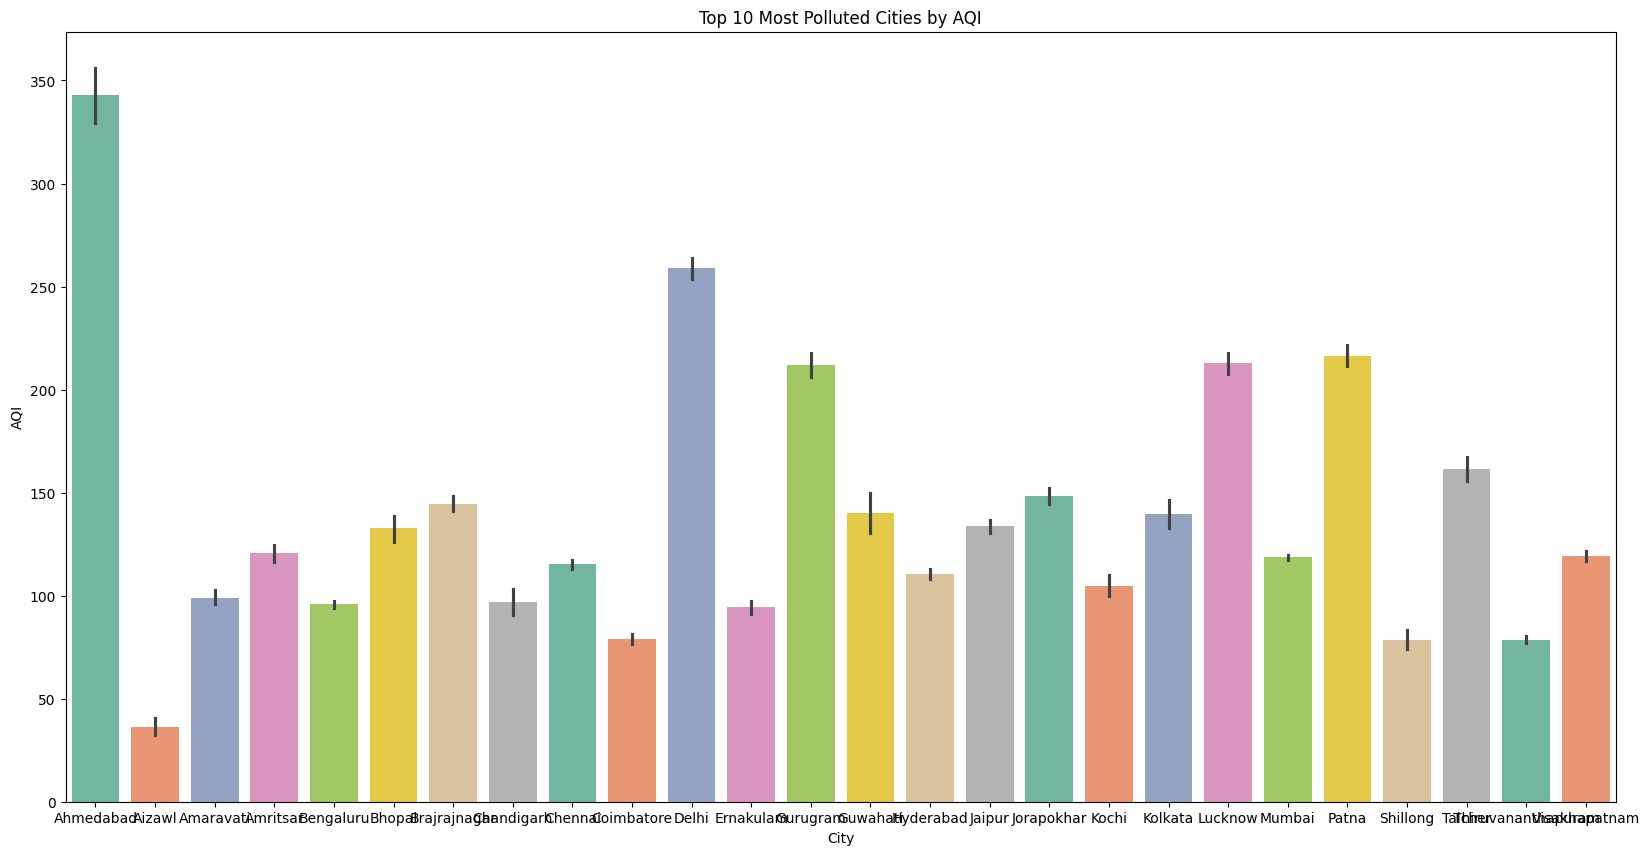

In [56]:
df.groupby('City')['AQI'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(20,10))
sns.barplot(x='City', y='AQI', data=df, palette='Set2')
plt.title('Top 10 Most Polluted Cities by AQI')
plt.show()

Q.02) Line plot showing monthly AQI trends for selected cities.

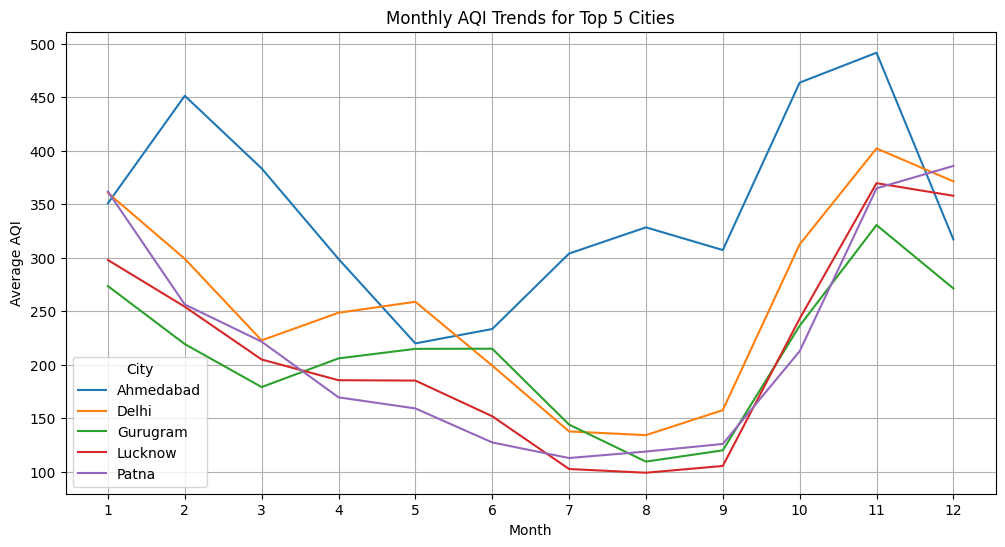

In [57]:
# Select top 5 cities with highest average AQI for visualization
top_cities = df.groupby('City')['AQI'].mean().sort_values(ascending=False).head(5).index.tolist()

# Filter the dataframe to include only the top cities
df_top_cities = df[df['City'].isin(top_cities)]

# Group by month and city to get the average AQI
monthly_aqi_cities = df_top_cities.groupby(['Month', 'City'])['AQI'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_aqi_cities, x='Month', y='AQI', hue='City')
plt.title('Monthly AQI Trends for Top 5 Cities')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.xticks(range(1, 13)) # Set x-axis ticks to represent months 1-12
plt.grid(True)
plt.show()

Q.03) Heatmap showing correlation between pollutants (PM2.5, PM10, NO2, SO2, O3, CO).

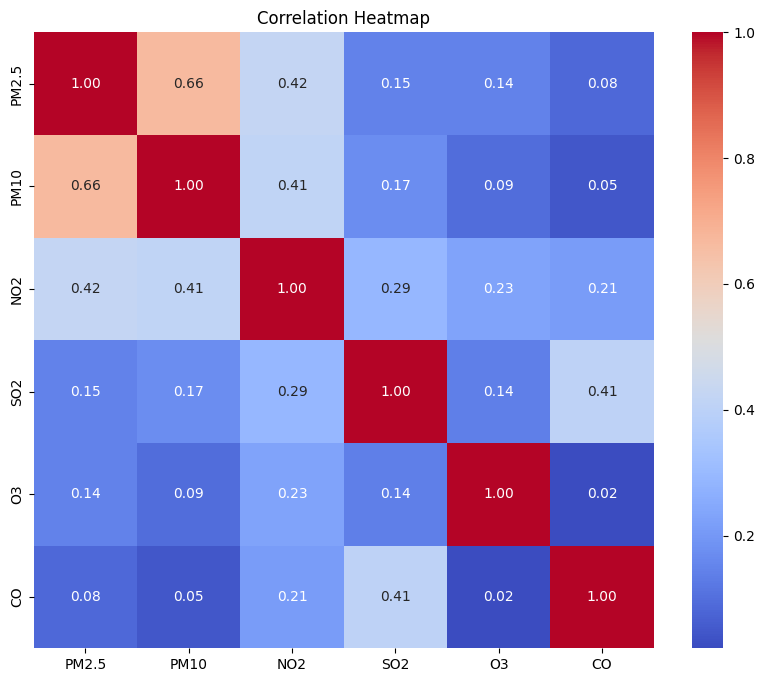

In [58]:
features = ['PM2.5', 'PM10', 'NO2', 'SO2', 'O3', 'CO']
corr = df[features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Q.04) Seasonal comparison plot of average AQI levels.

/tmp/ipython-input-1581761323.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Season', y='AQI', data=df, palette="Set2")


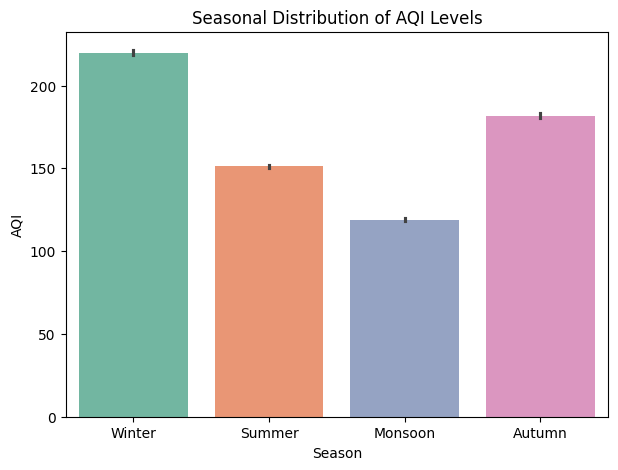

In [59]:
df.groupby('Season')['AQI'].mean().sort_values(ascending=False)
plt.figure(figsize=(7,5))
sns.barplot(x='Season', y='AQI', data=df, palette="Set2")
plt.title("Seasonal Distribution of AQI Levels")
plt.show()


Q.05) Stacked bar chart of pollutant contributions in different cities.

<Figure size 1500x800 with 0 Axes>

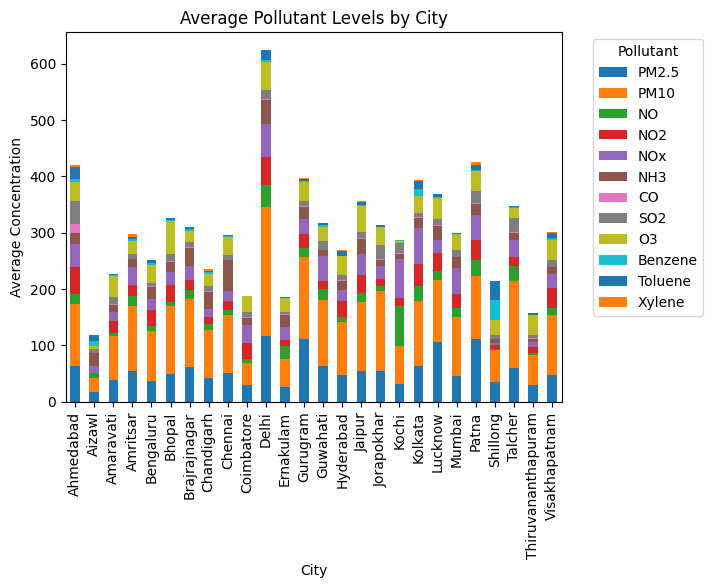

In [60]:
# Calculate the average of each pollutant for each city
avg_pollutants = df.groupby('City')[pollutants].mean()

plt.figure(figsize=(15, 8))
avg_pollutants.plot(kind='bar', stacked=True)
plt.title('Average Pollutant Levels by City')
plt.xlabel('City')
plt.ylabel('Average Concentration')
plt.legend(title='Pollutant', bbox_to_anchor=(1.05, 1), loc='upper left')

Q.06) Map visualization showing geographic distribution of AQI values.

In [64]:
import folium

city_coords = {
    "Delhi": [28.7041, 77.1025],
    "Mumbai": [19.0760, 72.8777],
    "Kolkata": [22.5726, 88.3639],
    "Chennai": [13.0827, 80.2707],
    "Bengaluru": [12.9716, 77.5946],
  }

# Calculate average AQI for each city
city_aqi = df.groupby("City")["AQI"].mean().reset_index()

# Create base map (India-centered example)
m = folium.Map(location=[22.9734, 78.6569], zoom_start=5)

# Add circle markers for each city
for _, row in city_aqi.iterrows():
    city = row["City"]
    aqi = row["AQI"]
    if city in city_coords:  # only plot if coords available
        folium.CircleMarker(
            location=city_coords[city],
            radius=7,
            popup=f"{city}: {aqi:.2f}",
            color="red" if aqi > 200 else "orange" if aqi > 100 else "green",
            fill=True,
            fill_opacity=0.7
        ).add_to(m)

# Save map to HTML file
m.save("aqi_map.html")


Q.07) Boxplot comparing AQI across major cities.

/tmp/ipython-input-3164588407.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='City', y='AQI', data=df_major_cities, palette='Set2')


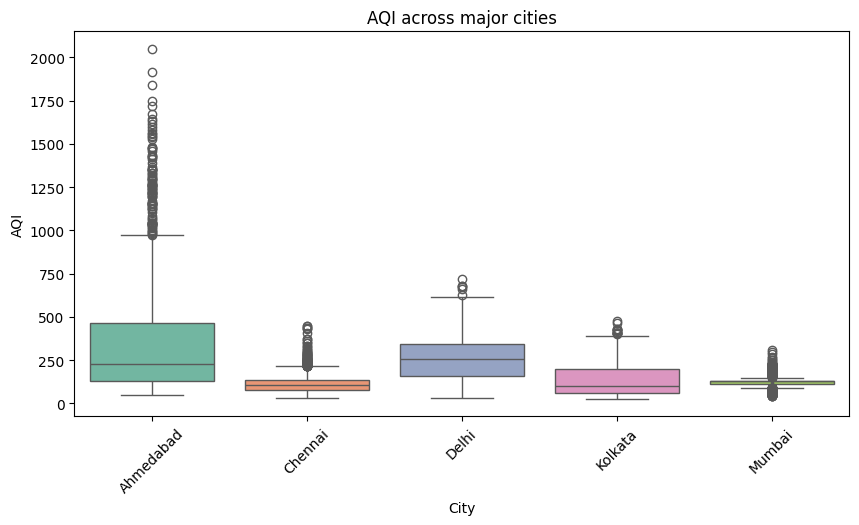

In [62]:
major_cities = ['Delhi', 'Mumbai', 'Kolkata', 'Chennai', 'Ahmedabad']
df_major_cities = df[df['City'].isin(major_cities)]

plt.figure(figsize=(10,5))
sns.boxplot(x='City', y='AQI', data=df_major_cities, palette='Set2')
plt.xlabel("City")
plt.ylabel("AQI")
plt.title("AQI across major cities")
plt.xticks(rotation=45)
plt.show()

In [63]:
from google.colab import files
files.download("aqi_map.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>